In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as Rot
from skeleton import skeleton
G, color_edge = skeleton()
from mpl_toolkits.mplot3d import Axes3D
import src.plotting as plotting
import src.transform as transform
import pickle
import matplotlib.pyplot as plt
import math
import matplotlib.animation as manimation

# Load sample data

In [4]:
#load 3D poses
d = pickle.load(open('pose.pkl', 'rb'))
dimensions = [i for i in range(38) if i not in [15,16,17,18,34,35,36,37]]
pts3d = d["points3d"][171][dimensions,:]
ptssh = d["points2d"][0,171,dimensions,:]

pts3d = pts3d - np.mean(pts3d, axis=0, keepdims=True)

In [5]:
%matplotlib notebook
from ipywidgets import interact
import ipywidgets as widgets

def cone(alpha1, alpha2, beta):
    
    radius = 2
    theta = np.linspace(alpha1,alpha2,50)
    r = np.linspace(-radius,radius,50)
    T, R = np.meshgrid(theta, r)
    
    X = np.sign(R)* R * np.cos(T)
    Y = np.sign(R)* R * np.sin(T)
    
    Xplus = X.copy()
    Xminus = X.copy()
    Yplus = Y.copy()
    Yminus = Y.copy() 
    Xplus[R<=0] = 0
    Xminus[R>=0] = 0
    Yplus[R<=0] = 0
    Yminus[R>=0] = 0
    
    Z = np.tan(beta)*np.sqrt(Xplus**2 + Yplus**2)- np.tan(beta)*np.sqrt(Xminus**2 + Yminus**2)
    
    z = np.linspace(-radius*np.tan(beta), radius*np.tan(beta), 50)
    U, V = np.meshgrid(z, theta)

    Zc = U
    Xc = radius*np.cos(V)
    Yc = radius*np.sin(V)
    
    return X,Y,Z, Xc,Yc,Zc

def three_d_plotter(offset, alphaL1, alphaL2, alphaR1, alphaR2, beta):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(131, projection="3d")
    ax1.view_init(elev=50, azim=-30)
    ax2 = fig.add_subplot(132, projection="3d")
    ax2.view_init(elev=0, azim=0)
    ax3 = fig.add_subplot(133, projection="3d")
    ax3.view_init(elev=90, azim=90)
    
    #left cone
    X,Y,Z, Xc,Yc,Zc = cone(np.radians(alphaL1), np.radians(alphaL2), np.radians(beta))
    ax1.plot_surface(X,Y,Z, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax2.plot_surface(X,Y,Z, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax3.plot_surface(X,Y,Z, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax1.plot_surface(Xc, Yc, Zc, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax2.plot_surface(Xc, Yc, Zc, alpha=0.3, color='blue', rstride=6, cstride=12)
    ax3.plot_surface(Xc, Yc, Zc, alpha=0.3, color='blue', rstride=6, cstride=12)
    
    #right cone
    X,Y,Z, Xc,Yc,Zc = cone(np.radians(alphaR1), np.radians(alphaR2), np.radians(beta))
    ax1.plot_surface(X,Y,Z, alpha=0.3, color='red', rstride=6, cstride=12)
    ax2.plot_surface(X,Y,Z, alpha=0.3, color='red', rstride=6, cstride=12)
    ax3.plot_surface(X,Y,Z, alpha=0.3, color='red', rstride=6, cstride=12)
    ax1.plot_surface(Xc, Yc, Zc, alpha=0.3, color='red', rstride=6, cstride=12)
    ax2.plot_surface(Xc, Yc, Zc, alpha=0.3, color='red', rstride=6, cstride=12)
    ax3.plot_surface(Xc, Yc, Zc, alpha=0.3, color='red', rstride=6, cstride=12)

    R = Rot.from_euler('xyz', [-np.pi/2, 0, np.radians(offset)], degrees=False).as_matrix()
    pts3d_display = np.matmul(R,pts3d.T).T

    plotting.plot_3d_graph(G, pts3d_display, ax1, color_edge=color_edge)
    plotting.plot_3d_graph(G, pts3d_display, ax2, color_edge=color_edge)
    plotting.plot_3d_graph(G, pts3d_display, ax3, color_edge=color_edge)
    
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_zlim(-1.5, 1.5)
    ax2.set_xlim(-3, 3)
    ax2.set_ylim(-3, 3)
    ax2.set_zlim(-1.5, 1.5)
    ax3.set_xlim(-2.5, 2.5)
    ax3.set_ylim(-2.5, 2.5)
    ax3.set_zlim(-2, 2)
    #ax1.set_xlabel("X")
    #ax1.set_ylabel("Y")
    #ax1.set_zlabel("Z")
    #ax2.set_xlabel("X")
    #ax2.set_ylabel("Y")
    #ax2.set_zlabel("Z")
    #ax3.set_xlabel("X")
    #ax3.set_ylabel("Y")
    #ax3.set_zlabel("Z")
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_zticklabels([])
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax2.set_zticklabels([])
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])
    ax3.set_zticklabels([])
    
    plt.savefig('angle_invariant.svg')

    plt.show()

interact(three_d_plotter, 
         offset = widgets.FloatSlider(
    min=-180,
    max=180,
    step=1,
    description='Long. axis (align with +x):',
    value=45
),
         alphaL1 = widgets.FloatSlider(
    min=-180,
    max=0,
    step=10,
    description='Left yaw min:',
    value=-150
),
         alphaL2 = widgets.FloatSlider(
    min=-180,
    max=0,
    step=10,
    description='Left yaw max:',
    value=-60
),
        alphaR1 = widgets.FloatSlider(
    min=0,
    max=180,
    step=10,
    description='Right yaw min:',
    value=60
),
         alphaR2 = widgets.FloatSlider(
    min=0,
    max=180,
    step=10,
    description='Right yaw max:',
    value=150
),
         beta = widgets.FloatSlider(
    min=0,
    max=90,
    step=1,
    description='Roll:',
    value=20
))

interactive(children=(FloatSlider(value=45.0, description='Long. axis (align with +x):', max=180.0, min=-180.0…

<function __main__.three_d_plotter(offset, alphaL1, alphaL2, alphaR1, alphaR2, beta)>

# Animate projections

lateral projection

In [ ]:
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15)

#set up axes
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131, projection="3d")
ax.view_init(elev=30, azim=25)
ax2 = fig.add_subplot(132, projection="3d")
ax2.view_init(elev=90, azim=0)
ax_2d = fig.add_subplot(133)

R = Rot.from_euler('xyz', [-np.pi/2, 0, 0], degrees=False).as_matrix()
pts3d_display = transform.world_to_camera(pts3d, {'R': R,'tvec':[0,0,0]})

#scan through rotations around y axis from 0 to pi
with writer.saving(fig, "projection.mp4", 100):
    for idx, alpha in enumerate(np.arange(0, 2*np.pi, 0.1)):

        #plot fly
        plotting.plot_3d_graph(G, pts3d_display, ax, color_edge=color_edge) 
        plotting.plot_3d_graph(G, pts3d_display, ax2, color_edge=color_edge)
    
        #plot view angle
        new_x = math.sin(alpha)
        new_y = math.cos(alpha)
        ax.quiver(-5*new_x, -5*new_y, 0, 2*new_x, 2*new_y, 0, color='b')
        ax2.quiver(-5*new_x, -5*new_y, 0, 2*new_x, 2*new_y, 0, color='b')
    
        #set axes
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(-1, 1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax2.set_xlim(-5, 5)
        ax2.set_ylim(-5, 5)
        ax2.set_zlim(-1, 1)
        ax2.set_xlabel("X")
        ax2.set_ylabel("Y")
        ax2.set_zlabel("Z")

        #plot projection
        R = Rot.from_euler('xyz', [0, -alpha, 0], degrees=False).as_matrix()
        pts3d_tmp = transform.world_to_camera(pts3d, {'R':R,'tvec':[0,0,117]})
        pts2d = transform.project_to_camera(pts3d_tmp, cam_par=(94*171,94*171,240,480))
        plotting.plot_skeleton(G, pts2d[:,0], -pts2d[:,1], ax=ax_2d, color_edge=color_edge) 
        
        writer.grab_frame()
        ax.cla()   
        ax2.cla()
        ax_2d.cla()

Ventral projection

In [ ]:
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15)

#set up axes
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection="3d")
ax.view_init(elev=30, azim=25)
#ax2 = fig.add_subplot(132, projection="3d")
#ax2.view_init(elev=90, azim=0)
ax_2d = fig.add_subplot(122)

R = Rot.from_euler('xyz', [-np.pi/2, 0, 0], degrees=False).as_matrix()
pts3d_display = transform.world_to_camera(pts3d, {'R': R,'tvec':[0,0,0]})

#scan through rotations around y axis from 0 to pi
with writer.saving(fig, "projection_ventral.mp4", 100):
    for idx, alpha in enumerate(np.arange(0, 2*np.pi, 0.1)):

        #plot fly
        plotting.plot_3d_graph(G, pts3d_display, ax, color_edge=color_edge) 
        #plotting.plot_3d_graph(G, pts3d_display, ax2, color_edge=color_edge)
    
        #plot view angle
        #new_x = math.sin(alpha)
        #new_y = math.cos(alpha)
        #ax.quiver(-5*new_x, -5*new_y, 0, 2*new_x, 2*new_y, 0, color='b')
        #ax2.quiver(-5*new_x, -5*new_y, 0, 2*new_x, 2*new_y, 0, color='b')
    
        #set axes
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(-1, 1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        #ax2.set_xlim(-5, 5)
        #ax2.set_ylim(-5, 5)
        #ax2.set_zlim(-1, 1)
        #ax2.set_xlabel("X")
        #ax2.set_ylabel("Y")
        #ax2.set_zlabel("Z")
        ax_2d.set_xlim([-200,600])
        ax_2d.set_ylim([-800,0])

        #plot projection
        R = Rot.from_euler('xzy', [-np.pi/2, -alpha, 0], degrees=False).as_matrix()
        pts3d_tmp = transform.world_to_camera(pts3d, {'R':R,'tvec':[0,0,117]})
        pts2d = transform.project_to_camera(pts3d_tmp, cam_par=(94*171,94*171,240,480))
        plotting.plot_skeleton(G, pts2d[:,0], -pts2d[:,1], ax=ax_2d, color_edge=color_edge) 
        
        writer.grab_frame()
        ax.cla()   
        ax2.cla()
        ax_2d.cla()

# Debug, check projections against camera

In [ ]:
np.array([-150,-60])+45
np.array([60,150])-45

In [ ]:
import numpy.linalg as nla

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection="3d")
#ax.view_init(elev=0, azim=-90)

plotting.plot_3d_graph(G, pts3d - np.mean(pts3d, axis=0, keepdims=True), ax, color_edge=color_edge) 
v = np.array([0,0,1])
angles = [[ 0, 24.60350012,  0],
[ 0, 53.46160296,  0],
[180,  83.84448047, 180],
[ 180,   38.64916463, -180],
[-180,   -6.47457067, -180],
[-180,  -52.26025239, -180 ],
[0,    -80.04581128, 0]]

angles2 = [[ 0, 24.60350012,  0],
[ 0, 53.46160296,  0],
[0,  180-83.84448047, 0],
[ 0,   180-38.64916463, 0],
[0,   180+6.47457067, 0],
[0,  180+52.26025239, 0 ],
[0,    180+80.04581128, 0]]

for i in range(6):
    #r2 = Rot.from_matrix(nla.inv(d[i]['R']))
    #angle = r2.as_euler('xyz', degrees=True)
    angle = angles[i]
    R = Rot.from_euler('xyz', angle, degrees=True).as_matrix()
    v1 = np.matmul(R,v)
    
    angle = angles2[i]
    R = Rot.from_euler('xyz', angle, degrees=True).as_matrix()
    v2 = np.matmul(R,v)
    #r2 = Rot.from_matrix(d[i]['R'])
    #angle = r2.as_euler('zyx', degrees=True)
    #print(angle)
    
#    #plot view angles
#    new_x = math.sin(alpha)
#    new_y = math.cos(alpha)
    #ax.quiver(-5*new_x, -5*new_y, 0, 2*new_x, 2*new_y, 0, color='b')
    ax.quiver(-5*v2[0], -5*v2[1], -5*v2[2], 2*v2[0], 2*v2[1], 2*v2[2], color='b')
    ax.quiver(-5*v1[0], -5*v1[1], -5*v1[2], 2*v1[0], 2*v1[1], 2*v1[2], color='r')
    #print(np.degrees(v1))


[[ 2.52688950e+00 -2.31736495e+00  1.16501265e+02]
 [ 2.36196422e+00 -1.82295495e+00  1.16439201e+02]
 [ 3.27068482e+00 -2.10013913e+00  1.16632853e+02]
 [ 3.14028362e+00 -1.40265678e+00  1.16475613e+02]
 [ 3.53900077e+00 -7.04065395e-01  1.16456008e+02]
 [ 1.96244675e+00 -2.05940511e+00  1.16562950e+02]
 [ 2.06028212e+00 -1.67597140e+00  1.16594932e+02]
 [ 2.52455106e+00 -1.98751393e+00  1.17432358e+02]
 [ 2.90142044e+00 -1.21681282e+00  1.16898162e+02]
 [ 3.65247099e+00 -6.07211421e-01  1.16979309e+02]
 [ 1.79250767e+00 -1.96748331e+00  1.16683970e+02]
 [ 1.71821305e+00 -1.63903101e+00  1.16724595e+02]
 [ 1.65953868e+00 -2.24242758e+00  1.17607726e+02]
 [ 1.31037461e+00 -1.30506960e+00  1.17834756e+02]
 [ 1.04831971e+00 -5.08835118e-01  1.18530937e+02]
 [ 2.09412893e+00 -2.22128960e+00  1.15618258e+02]
 [ 2.03888840e+00 -1.75782015e+00  1.15715932e+02]
 [ 2.59619514e+00 -1.60216776e+00  1.15031680e+02]
 [ 2.94789303e+00 -9.81756699e-01  1.14786058e+02]
 [ 3.28963767e+00 -4.42402464e-

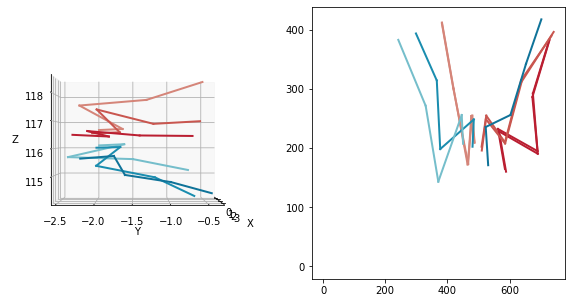

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection="3d")
ax.view_init(elev=0, azim=0)
ax_2d = fig.add_subplot(122)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

pxpermm = 171
focal_length = 94

pts3d_rot = d["points3d"][171][dimensions,:]
pts3d_rot = transform.world_to_camera(pts3d_rot, {'R':d[0]['R'], 'tvec': d[0]['tvec']})
pts3d_proj = transform.project_to_camera(pts3d_rot,(focal_length*pxpermm, focal_length*pxpermm, 240, 480))

plotting.plot_3d_graph(G, pts3d_rot, ax, color_edge=color_edge) 
plotting.plot_skeleton(G, ptssh[:,0], ptssh[:,1], ax=ax_2d, color_edge=color_edge) 
plotting.plot_skeleton(G, pts3d_proj[:,0], pts3d_proj[:,1], ax=ax_2d, color_edge=color_edge) 

In [ ]:
for i in range(7):
    r2 = Rot.from_matrix(d[i]['R'])
    print(r2.as_euler('xyz', degrees=True))